In [60]:
import os

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from voxelwise_tutorials.viz import plot_flatmap_from_mapper, plot_2d_flatmap_from_mapper

from compare_variance_residual.fmri.results import get_result_path

In [68]:
def load_scores(subject, modality, low_level_feature):
    result_path = get_result_path(modality, subject)
    low_level_scores = pd.read_csv(os.path.join(result_path, f"{low_level_feature}_scores.csv"))["correlation_score"]
    semantic_scores = pd.read_csv(os.path.join(result_path, f"english1000_scores.csv"))["correlation_score"]
    vp_scores = pd.read_csv(os.path.join(result_path, f"vp_english1000_{low_level_feature}_scores.csv"))[f"semantic\\{low_level_feature}"]
    rm_scores = pd.read_csv(os.path.join(result_path, f"residual_{low_level_feature}_english1000_scores.csv"))["correlation_score"]
    rm_ridge_scores = pd.read_csv(os.path.join(result_path, f"residual_ridge_{low_level_feature}_english1000_scores.csv"))["correlation_score"]
    low_level_scores, semantic_scores, vp_scores, rm_scores, rm_ridge_scores = low_level_scores.values, semantic_scores.values, vp_scores.values, rm_scores.values, rm_ridge_scores.values
    # remove nans using nan_to_num
    low_level_scores, semantic_scores, vp_scores, rm_scores, rm_ridge_scores = np.nan_to_num([low_level_scores, semantic_scores, vp_scores, rm_scores, rm_ridge_scores])

    vmin = np.min([low_level_scores, semantic_scores, vp_scores, rm_scores, rm_ridge_scores])
    vmax = np.max([low_level_scores, semantic_scores, vp_scores, rm_scores, rm_ridge_scores])
    print(vmin, vmax)
    return low_level_scores, semantic_scores, vp_scores, rm_scores, rm_ridge_scores, vmin, vmax

In [112]:
def plot_summary(subject, modality, low_level_feature):
    low_level_scores, semantic_scores, vp_scores, rm_scores, rm_ridge_scores, vmin, vmax = load_scores(subject, modality, low_level_feature)
    mapper_path = f"../../data/mappers/subject{subject:02}_mappers.hdf"
    fig = plt.figure(figsize=(16, 6))
    subfig1, subfig2 = fig.subfigures(2, 1)

    axs1 = subfig1.subplots(1, 2)
    for ax, score, name in zip(axs1, [semantic_scores, low_level_scores], ["Semantic", low_level_feature]):
        plot_flatmap_from_mapper(score, mapper_path, ax, vmin=0, vmax=vmax)
        ax.set_title(name)

    axs2 = subfig2.subplots(1, 3)
    for ax, score, name in zip(axs2, [rm_ridge_scores, rm_scores, vp_scores], ["Residual Ridge", "Residual", "VP"]):
        plot_2d_flatmap_from_mapper(semantic_scores, score, mapper_path, ax, vmin=0, vmax=vmax, vmin2=0, vmax2=vmax)
        ax.set_title(f"Semantic/{name}")

    for ax in np.concatenate([axs1, axs2]):
        ax.axis("off")

    plt.tight_layout()
    fig.suptitle(f"Subject {subject}, {modality}")
    plt.show()

In [113]:
subject = 5
modality = "reading"
low_level_feature = "moten"

-0.3002694480166044 0.6502390803218216


/tmp/ipykernel_3418/3816766583.py:20: UserWarning: tight_layout not applied: number of columns in subplot specifications must be multiples of one another.
  plt.tight_layout()


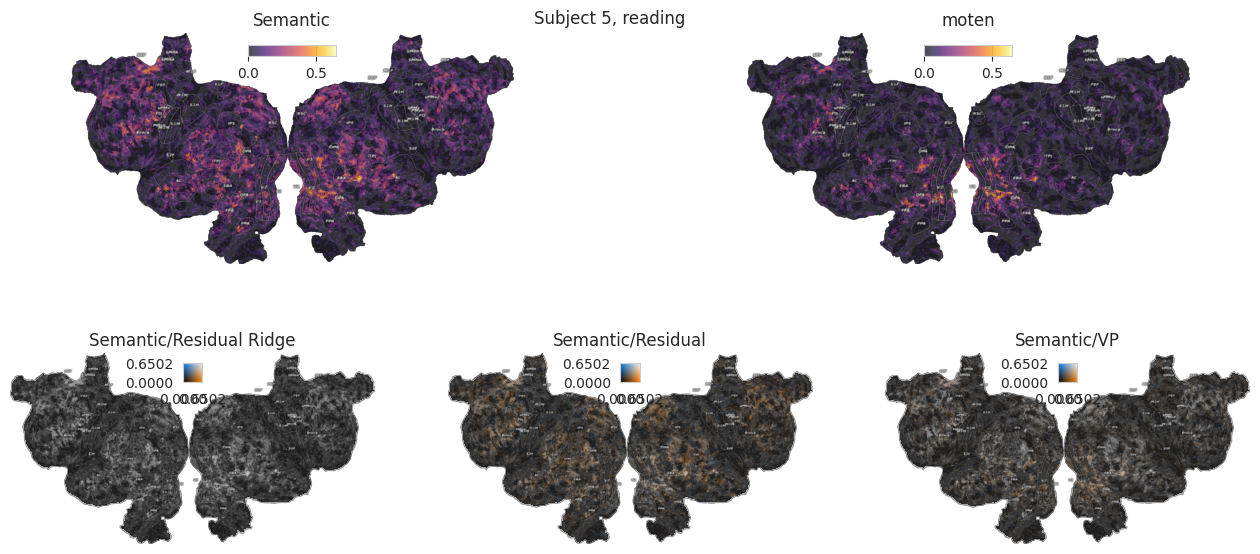

In [114]:
plot_summary(subject, modality, low_level_feature)